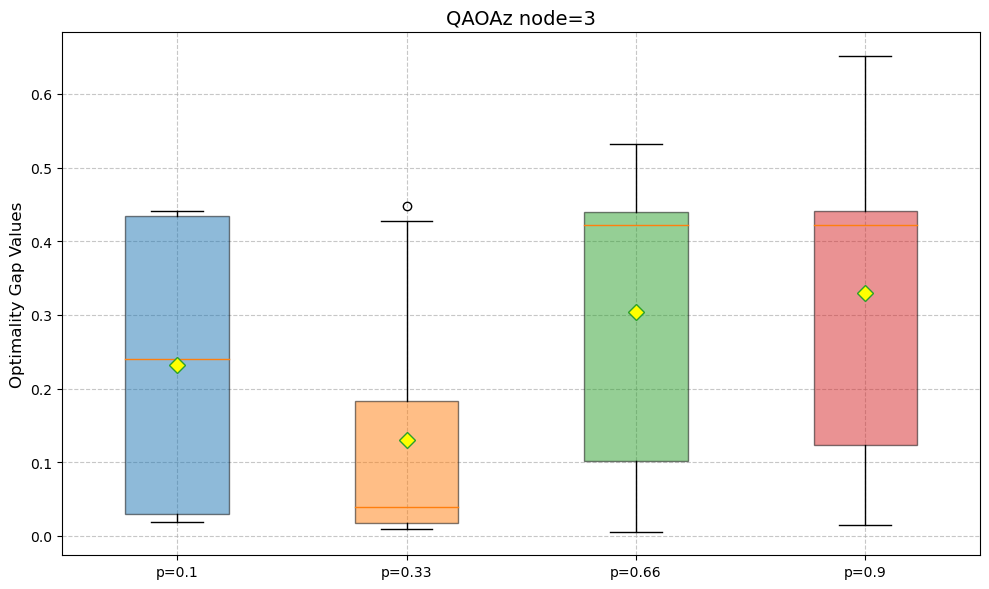

In [9]:
import matplotlib.pyplot as plt
import re

# 读取数据
data = []
with open('avg_opt_n3_qaoaz.txt', 'r') as file: 
    for line in file:
        line = line.strip()
        if line.startswith('avg_opt_gaps:'):
            # 使用正则表达式提取数组内容
            match = re.search(r'\[(.*)\]', line)
            if match:
                numbers_str = match.group(1)
                # 转换字符串为浮点数列表
                numbers = [float(num.strip()) for num in numbers_str.split(',')]
                data.append(numbers)

p = ['0.1','0.33','0.66','0.9']
# 创建箱线图
plt.figure(figsize=(10, 6))
box = plt.boxplot(data, 
                 patch_artist=True,
                 labels=[f'p={p[i]}' for i in range(len(data))],
                 showmeans=True,
                 meanprops={'marker':'D', 'markerfacecolor':'yellow', 'markersize':8})

# 设置颜色和样式
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.5)

# 添加标题和标签
plt.title('QAOAz node=3', fontsize=14)
#plt.xlabel('', fontsize=12)
plt.ylabel('Optimality Gap Values', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

# 显示图表
plt.tight_layout()
plt.show()

In [2]:
%matplotlib inline

plt.style.use("default")



The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


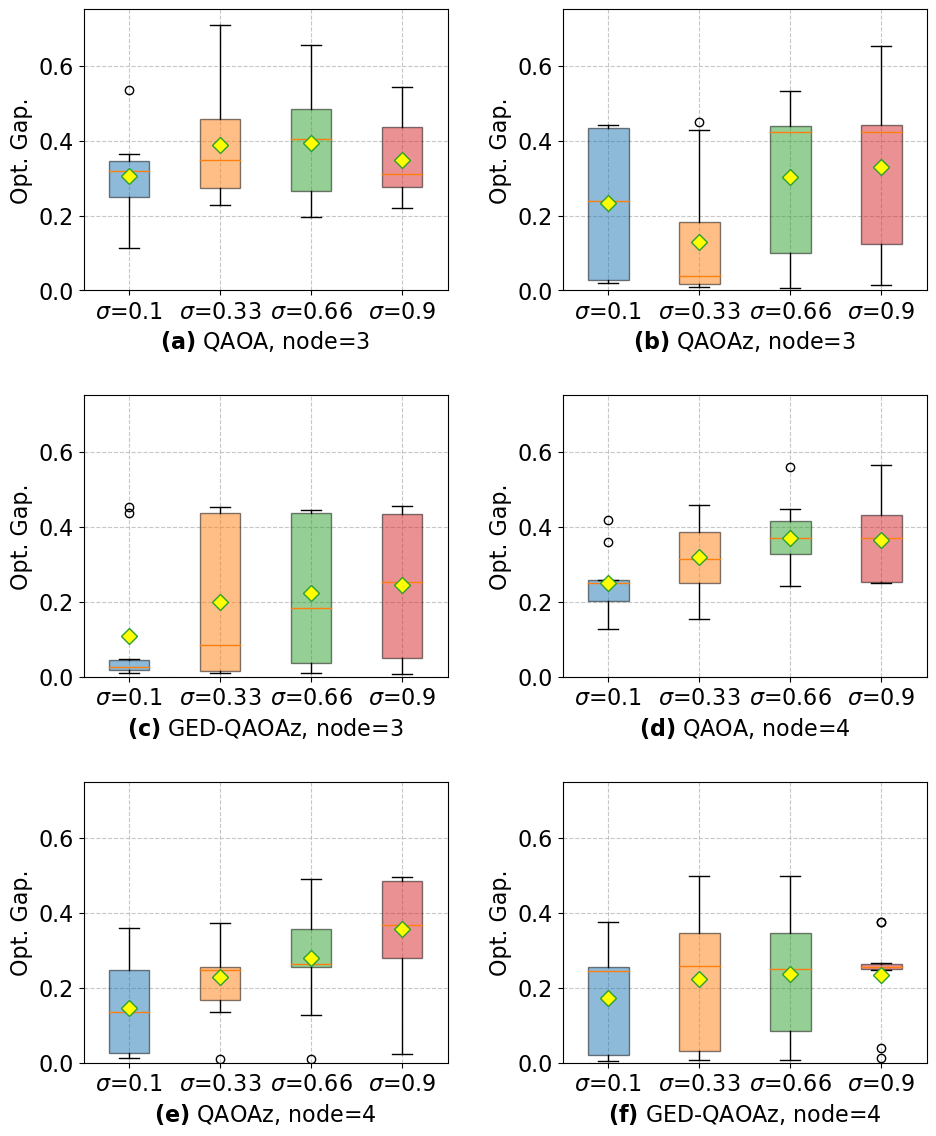

In [10]:
import matplotlib.pyplot as plt
import re

# 读取数据
all_data = []
with open('data.txt', 'r') as file:
    for line in file:
        if line.startswith('avg_opt_gaps:'):
            # 提取数组内容并转换为浮点数列表
            numbers_str = re.search(r'\[(.*)\]', line).group(1)
            all_data.append([float(num) for num in numbers_str.split(',')])

# 将数据分为每组4个数组
groups = [all_data[i:i+4] for i in range(0, len(all_data), 4)]

# 创建画布和子图
fig, axes = plt.subplots((len(groups) + 1) // 2, 2, 
                        figsize=(10, 2*len(groups)),
                        facecolor='white')
axes = axes.flatten()
# 统一颜色配置
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']
# 名称
name = ['QAOA','QAOAz','GED-QAOAz']
p = ['0.1','0.33','0.66','0.9']
node = ['3','4']
label = ['a','b','c','d','e','f']
# 获取所有数据的y轴范围
all_y_data = [item for group in groups for item in group]
y_min = 0
y_max = 0.75
# 遍历每组数据绘制子图
for idx, (ax, group_data) in enumerate(zip(axes, groups)):
    # 创建箱线图
    box = ax.boxplot(group_data,
                    patch_artist=True,
                    labels=[f'$\sigma$={p[i]}' for i in range(len(group_data))],
                    showmeans=True,
                    meanprops={'marker':'D', 'markerfacecolor':'yellow', 'markersize':8})
    
    # 设置颜色和透明度
    for patch, color in zip(box['boxes'], colors):
        patch.set_facecolor(color)
        patch.set_alpha(0.5)
    
    # 添加子图标题和标签
    ax.set_xlabel(f'$\mathbf{{({label[idx]})}}$ {name[idx%3]}, node={node[idx//3]}', fontsize=16)
    ax.set_ylabel('Opt. Gap.', fontsize=16)
    ax.grid(True, linestyle='--', alpha=0.7)
    ax.tick_params(axis='both', labelsize=16)
    # 设置y轴范围
    ax.set_ylim(y_min, y_max)
# 调整布局
plt.tight_layout(pad=3.0)

plt.savefig("Figure4_opt.eps", format='eps', transparent=False)

plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


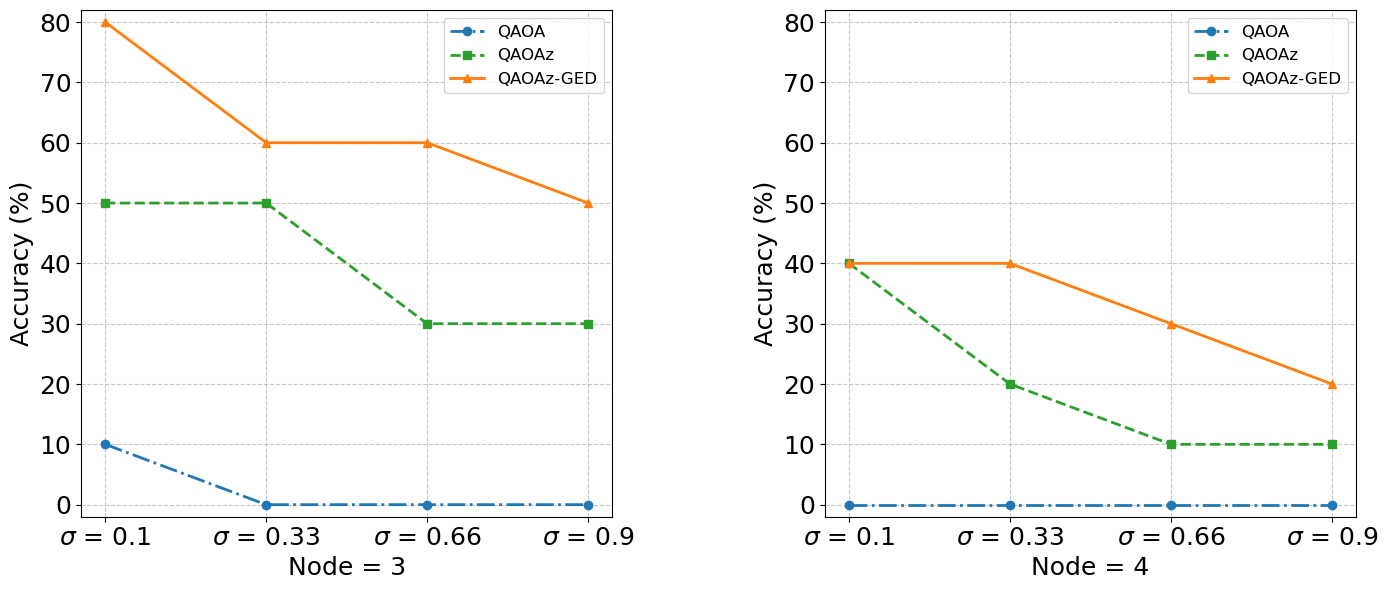

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# 配置参数
# plt.rcParams['font.sans-serif'] = ['SimHei']  # 显示中文
# plt.rcParams['axes.unicode_minus'] = False  # 显示负号

x_labels = ['$\sigma$ = 0.1', '$\sigma$ = 0.33', '$\sigma$ = 0.66', '$\sigma$ = 0.9']


method1 = [10, 0.0, 0.0, 0.0],[0.0, 0.0, 0.0, 0.0]  # QAOA准确率
method2 = [50, 50, 30, 30],[40, 20, 10, 10]  # QAOAz准确率
method3 = [80, 60, 60, 50],[40, 40, 30, 20] # QAOAz-GED准确率

# 创建画布和子图（1行2列）
fig, axes = plt.subplots(1, 2, figsize=(14, 6), facecolor='white')
axes = axes.flatten()

for idx, ax in enumerate(axes):
    # 创建画布
    # 绘制折线
    ax.plot(x_labels, method1[idx], 
            marker='o', linestyle='-.', linewidth=2, 
            color='#1f77b4', label='QAOA')
    ax.plot(x_labels, method2[idx], 
            marker='s', linestyle='--', linewidth=2,
            color='#2ca02c', label='QAOAz')
    ax.plot(x_labels, method3[idx], 
            marker='^', linestyle='-', linewidth=2,
            color='#ff7f0e', label='QAOAz-GED')
    ax.tick_params(axis='both', labelsize=16)
    # 设置坐标轴
    ax.set_ylim(-2, 82)  # 设置Y轴范围
    ax.set_ylabel('Accuracy (%)', fontsize=18)
    #ax.set_xlabel(f'Node = {idx+3}', fontsize=18)
    # 添加辅助元素
    #ax.set_title('不同方法在不同概率下的准确率对比', fontsize=14, pad=15)
    ax.grid(True, linestyle='--', alpha=0.7)
    ax.legend(loc='upper right', fontsize=12)

plt.tight_layout()
fig.subplots_adjust(wspace=0.4)
plt.savefig("Figure5_acc_n.eps", format='eps', transparent=False)
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


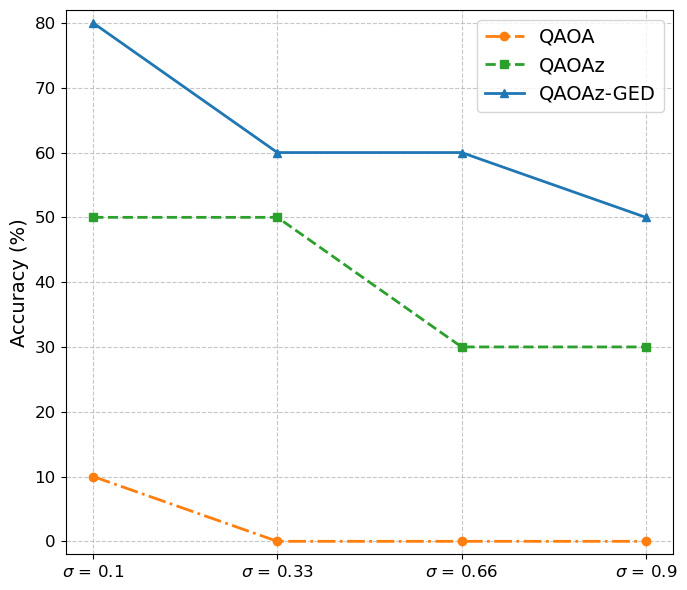

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


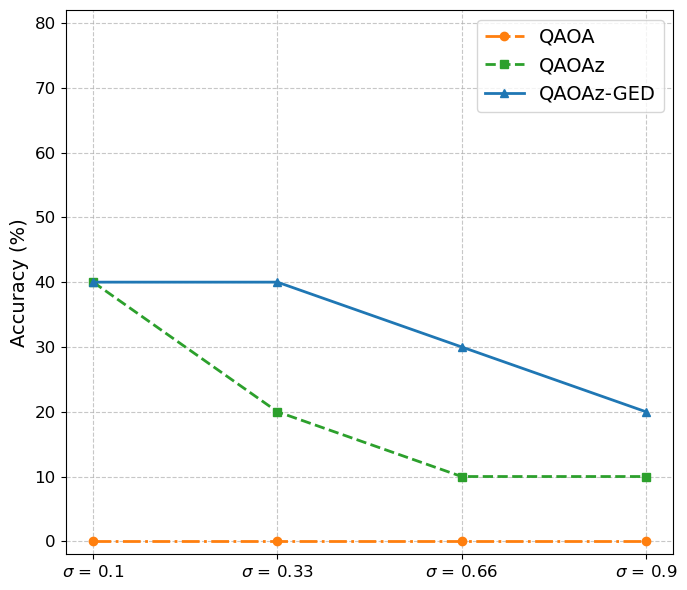

In [6]:

import matplotlib.pyplot as plt
import numpy as np

# 配置参数
# plt.rcParams['font.sans-serif'] = ['SimHei']  # 显示中文
# plt.rcParams['axes.unicode_minus'] = False  # 显示负号

x_labels = ['$\\sigma$ = 0.1', '$\\sigma$ = 0.33', '$\\sigma$ = 0.66', '$\\sigma$ = 0.9']

method1 = [[10, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0]]  # QAOA准确率
method2 = [[50, 50, 30, 30], [40, 20, 10, 10]]  # QAOAz准确率
method3 = [[80, 60, 60, 50], [40, 40, 30, 20]]  # QAOAz-GED准确率

# 创建单独的图表
for idx in range(2):
    fig, ax = plt.subplots(figsize=(7, 6), facecolor='white')

    # 绘制折线
    ax.plot(x_labels, method1[idx],
            marker='o', linestyle='-.', linewidth=2,
            color='#ff7f0e', label='QAOA')
    ax.plot(x_labels, method2[idx],
            marker='s', linestyle='--', linewidth=2,
            color='#2ca02c', label='QAOAz')
    ax.plot(x_labels, method3[idx],
            marker='^', linestyle='-', linewidth=2,
            color='#1f77b4', label='QAOAz-GED')

    # 设置坐标轴
    ax.set_ylim(-2, 82)  # 设置Y轴范围
    ax.set_ylabel('Accuracy (%)', fontsize=14)
    ax.tick_params(axis='both', labelsize=12)
    # ax.set_xlabel(f'Node = {idx+3}', fontsize=18)

    # 添加辅助元素
    # ax.set_title('不同方法在不同概率下的准确率对比', fontsize=14, pad=15)
    ax.grid(True, linestyle='--', alpha=0.7)
    ax.legend(loc='upper right', fontsize=14)

    # 保存和显示
    plt.tight_layout()
    plt.savefig(f"Figure5_acc_n{idx + 3}.eps", format='eps', transparent=False)
    plt.show()


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


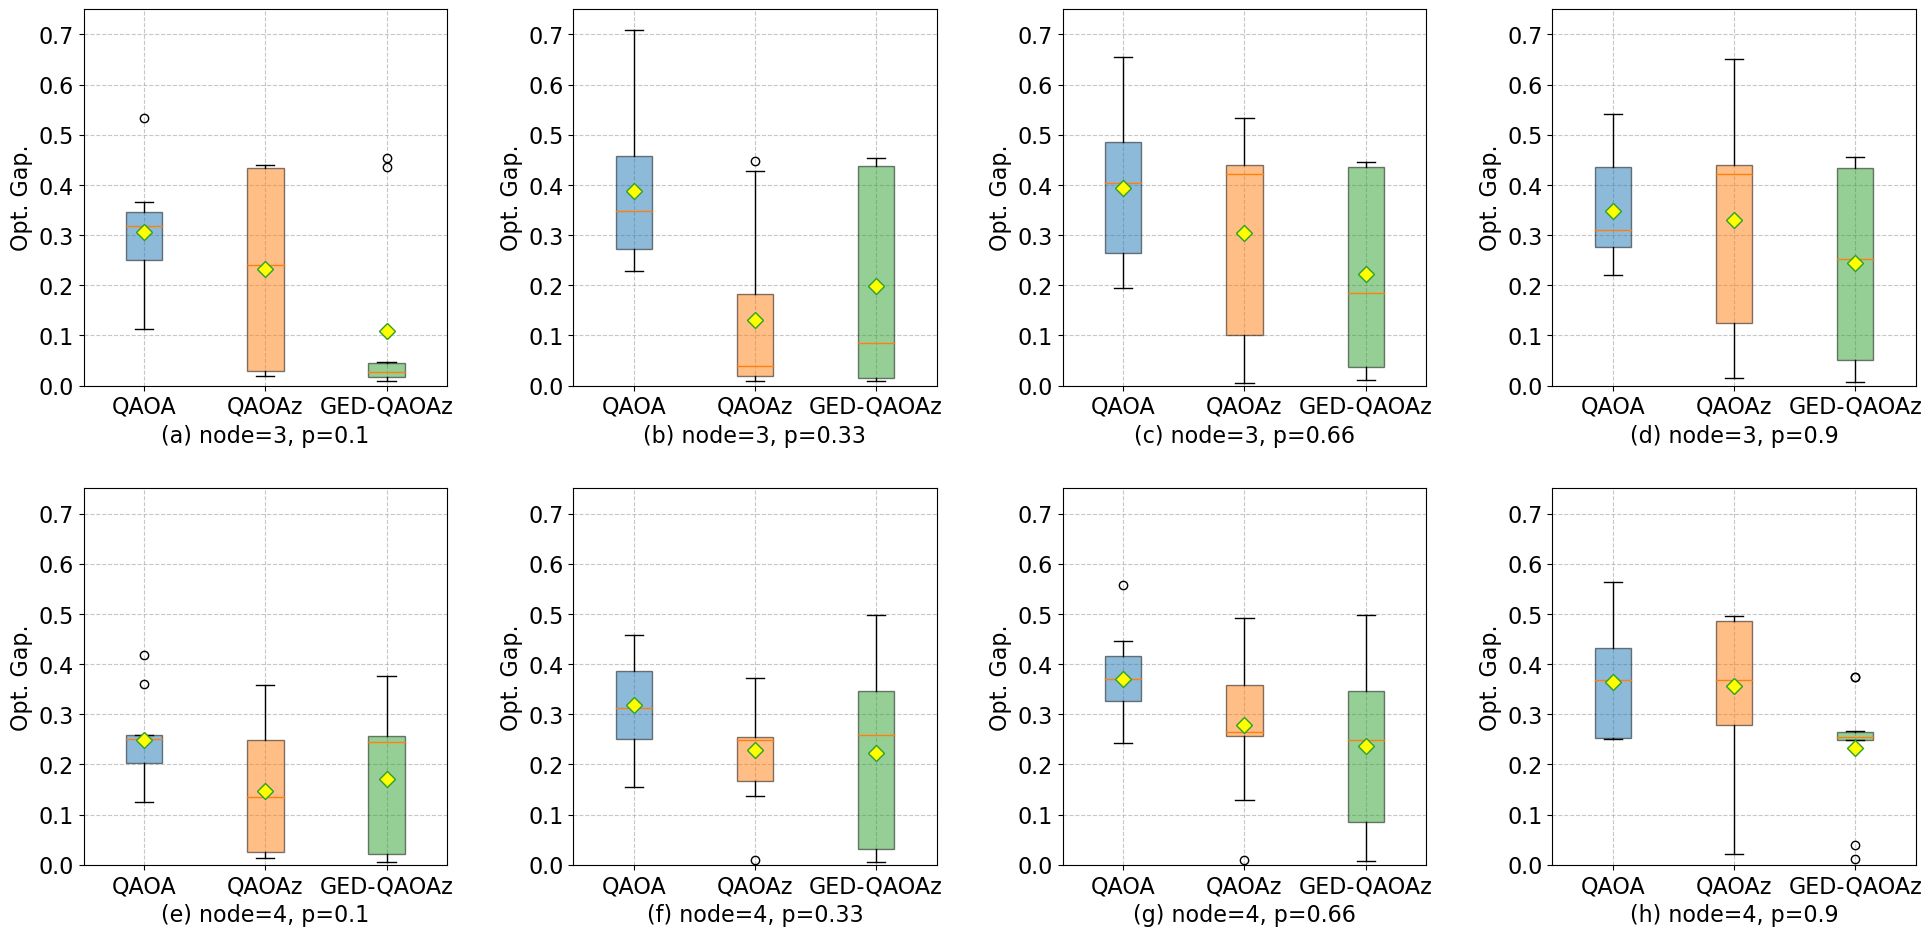

In [16]:
# 读取数据
import re
import matplotlib.pyplot as plt

all_data = []
with open('data.txt', 'r') as file:
    for line in file:
        if line.startswith('avg_opt_gaps:'):
            # 提取数组内容并转换为浮点数列表
            numbers_str = re.search(r'\[(.*)\]', line).group(1)
            all_data.append([float(num) for num in numbers_str.split(',')])

# 将数据分为每组4个数组（原分组逻辑）
groups = [all_data[i:i+4] for i in range(0, len(all_data), 4)]

# 重新组织数据结构
new_groups = []
p_values = ['0.1', '0.33', '0.66', '0.9']
for node_idx in range(2):  # 0=node3, 1=node4
    for p_idx in range(4):  # 遍历4个p值
        # 获取三个方法对应的数据
        qaoa = groups[node_idx*3 + 0][p_idx]   # QAOA数据
        qaoaz = groups[node_idx*3 + 1][p_idx] # QAOAz数据
        ged = groups[node_idx*3 + 2][p_idx]   # GED-QAOAz数据
        new_groups.append([qaoa, qaoaz, ged])

# 创建画布和子图（2行4列）
fig, axes = plt.subplots(2, 4, figsize=(20, 10), facecolor='white')
axes = axes.flatten()

# 统一颜色配置（与方法数量一致）
colors = ['#1f77b4', '#2ca02c', '#ff7f0e']
labels = ['(a)', '(b)', '(c)', '(d)', '(e)', '(f)', '(g)', '(h)']
node_names = ['3', '4']

# 设置全局y轴范围
y_min, y_max = 0, 0.75

# 遍历每组数据绘制子图
for idx, ax in enumerate(axes):
    # 获取当前子图数据
    group_data = new_groups[idx]
    # 计算node和p的索引
    node_idx = idx // 4  # 0=node3, 1=node4
    p_idx = idx % 4     # p值索引
    
    # 创建箱线图
    box = ax.boxplot(group_data,
                    patch_artist=True,
                    labels=['QAOA', 'QAOAz', 'GED-QAOAz'],
                    showmeans=True,
                    meanprops={'marker':'D', 'markerfacecolor':'yellow', 'markersize':8})
    
    # 设置颜色和透明度
    for patch, color in zip(box['boxes'], colors):
        patch.set_facecolor(color)
        patch.set_alpha(0.5)
    
    # 添加子图标题和标签
    title = f'{labels[idx]} node={node_names[node_idx]}, p={p_values[p_idx]}'
    ax.set_xlabel(title, fontsize=16)
    ax.set_ylabel('Opt. Gap.', fontsize=16)
    ax.grid(True, linestyle='--', alpha=0.7)
    ax.tick_params(axis='both', labelsize=16)
    ax.set_ylim(y_min, y_max)

# 调整布局
plt.tight_layout(pad=3.0)
plt.savefig("Figure5_opt8.eps", format='eps', transparent=False)
plt.show()

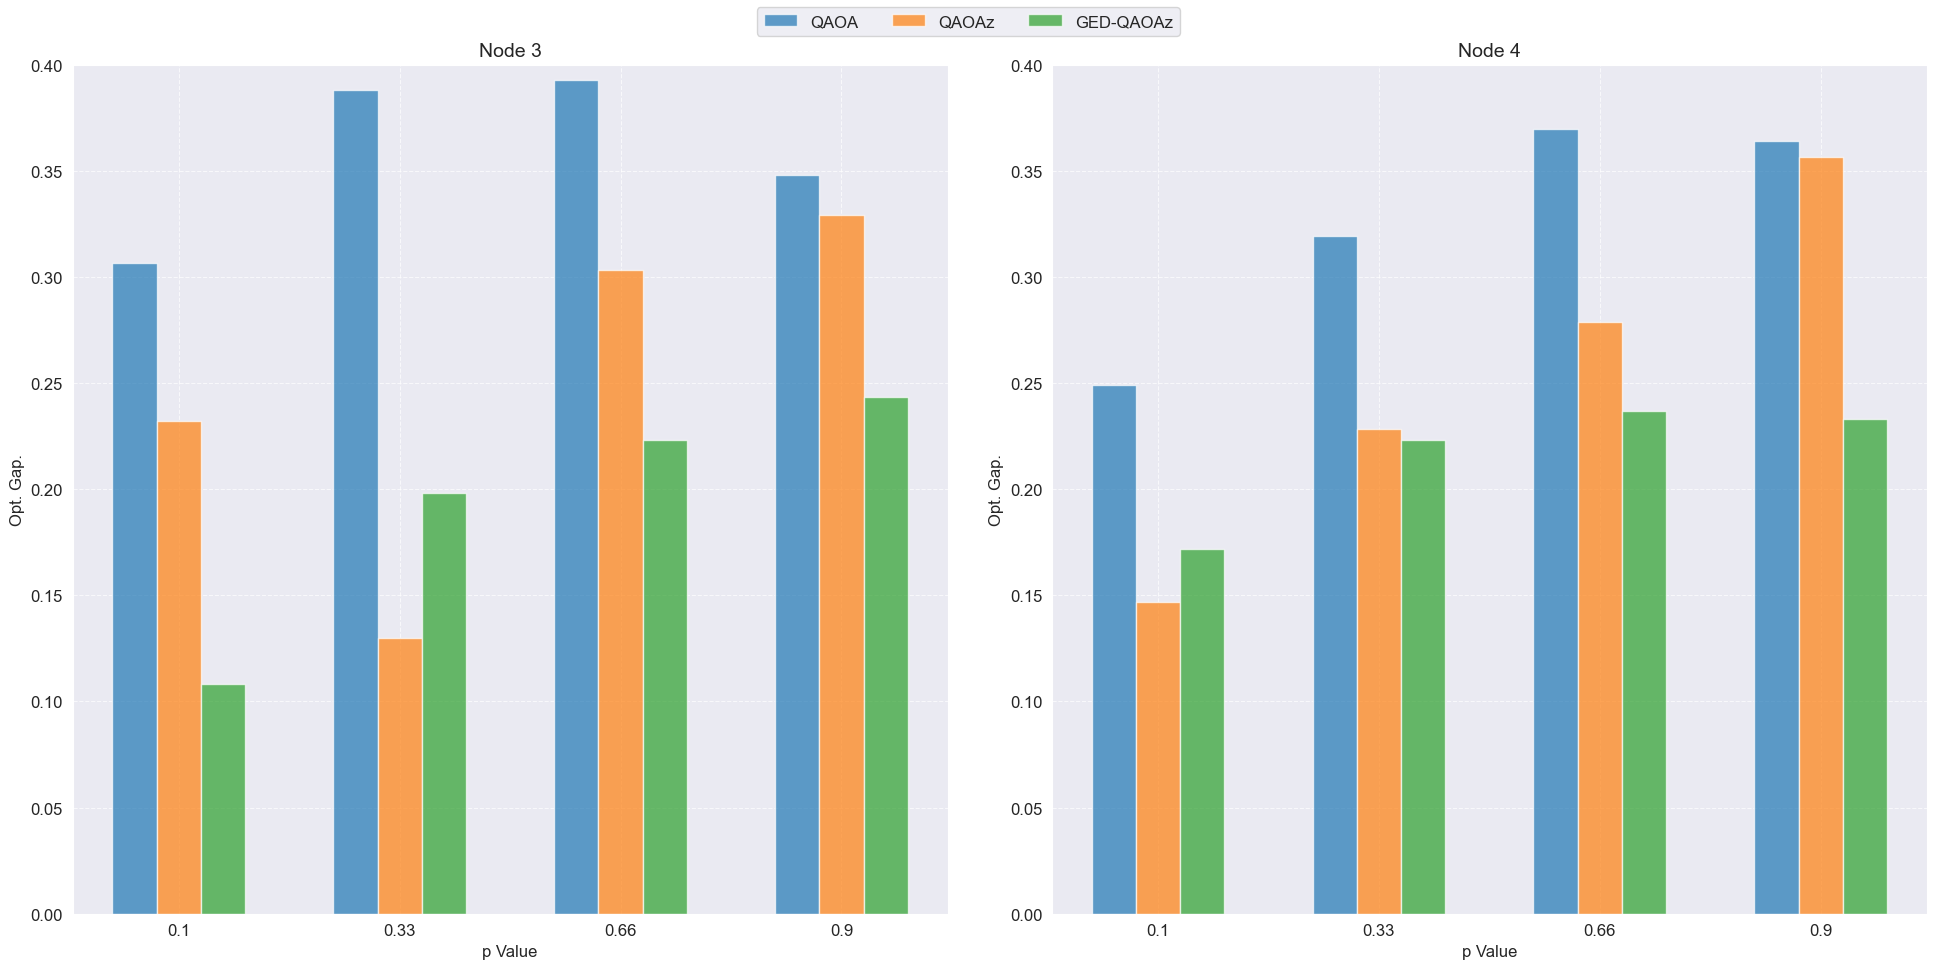

In [6]:
import re
import matplotlib.pyplot as plt
import numpy as np

all_data = []
with open('data.txt', 'r') as file:
    for line in file:
        if line.startswith('avg_opt_gaps:'):
            # 提取数组内容并转换为浮点数列表
            numbers_str = re.search(r'\[(.*)\]', line).group(1)
            all_data.append([float(num) for num in numbers_str.split(',')])

# 将数据分为每组4个数组（原分组逻辑）
groups = [all_data[i:i+4] for i in range(0, len(all_data), 4)]

# 重新组织数据结构
new_groups = []
p_values = ['0.1', '0.33', '0.66', '0.9']
for node_idx in range(2):  # 0=node3, 1=node4
    for p_idx in range(4):  # 遍历4个p值
        # 获取三个方法对应的数据
        qaoa = groups[node_idx*3 + 0][p_idx]   # QAOA数据
        qaoaz = groups[node_idx*3 + 1][p_idx] # QAOAz数据
        ged = groups[node_idx*3 + 2][p_idx]   # GED-QAOAz数据
        new_groups.append([qaoa, qaoaz, ged])

# 创建画布和子图（1行2列）
fig, axes = plt.subplots(1, 2, figsize=(20, 10), facecolor='white')
axes = axes.flatten()

# 统一颜色配置（与方法数量一致）
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']
labels = ['QAOA', 'QAOAz', 'GED-QAOAz']
node_names = ['3', '4']

# 设置全局y轴范围
y_min, y_max = 0, 0.40

# 绘制柱状图
for idx, ax in enumerate(axes):
    # 获取当前节点的数据
    node_data = new_groups[idx*4:(idx+1)*4]  # 每个节点有4个p值的不同数据
    bar_width = 0.2  # 每组柱子的宽度
    index = np.arange(len(p_values))  # x坐标
    
    # 每个方法的柱状图偏移
    qaoa_means = [np.mean(data[0]) for data in node_data]
    qaoaz_means = [np.mean(data[1]) for data in node_data]
    ged_means = [np.mean(data[2]) for data in node_data]

    ax.bar(index - bar_width, qaoa_means, bar_width, label='QAOA', color=colors[0], alpha=0.7)
    ax.bar(index, qaoaz_means, bar_width, label='QAOAz', color=colors[1], alpha=0.7)
    ax.bar(index + bar_width, ged_means, bar_width, label='GED-QAOAz', color=colors[2], alpha=0.7)
    
    # 添加标题和标签
    ax.set_title(f'Node {node_names[idx]}', fontsize=14)
    ax.set_xlabel('p Value', fontsize=12)
    ax.set_ylabel('Opt. Gap.', fontsize=12)
    ax.set_xticks(index)
    ax.set_xticklabels(p_values)
    ax.set_ylim(y_min, y_max)
    ax.grid(True, linestyle='--', alpha=0.7)
    ax.tick_params(axis='both', labelsize=12)

# 添加图例
fig.legend(labels=labels, loc='upper center', fontsize=12, ncol=3)

# 调整布局
plt.tight_layout(pad=3.0)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


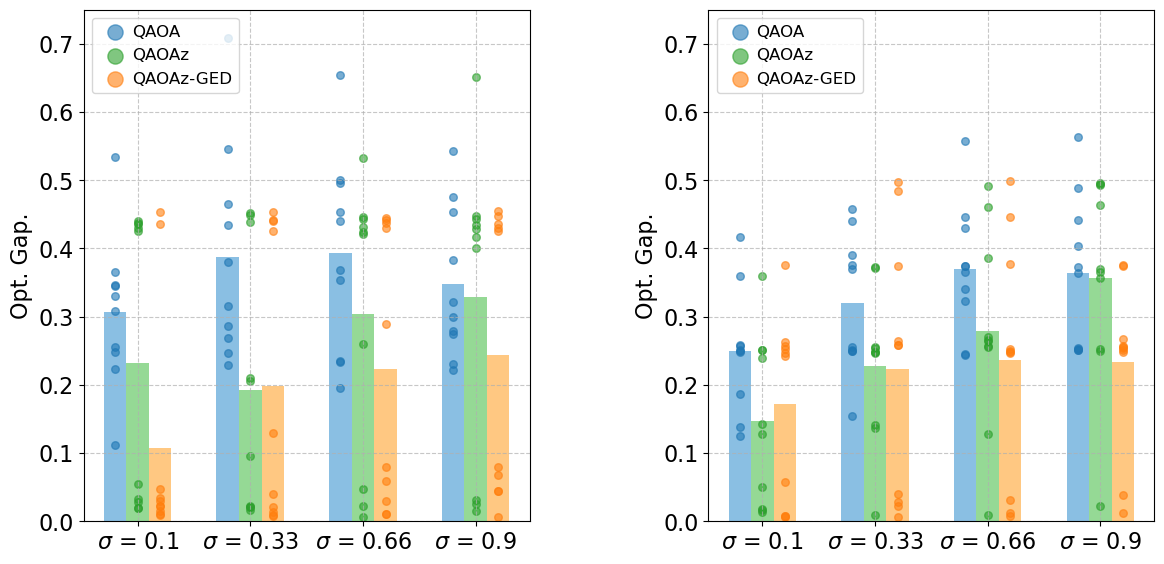

In [4]:
import re
import matplotlib.pyplot as plt
import numpy as np

# 读取数据
all_data = []
with open('data.txt', 'r') as file:
    for line in file:
        if line.startswith('avg_opt_gaps:'):
            # 提取数组内容并转换为浮点数列表
            numbers_str = re.search(r'\[(.*)\]', line).group(1)
            all_data.append([float(num) for num in numbers_str.split(',')])

# 将数据分为每组4个数组（原分组逻辑）
groups = [all_data[i:i+4] for i in range(0, len(all_data), 4)]

# 重新组织数据结构
new_groups = []
p_values = ['0.1', '0.33', '0.66', '0.9']
for node_idx in range(2):  # 0=node3, 1=node4
    for p_idx in range(4):  # 遍历4个p值
        # 获取三个方法对应的数据
        qaoa = groups[node_idx*3 + 0][p_idx]   # QAOA数据
        qaoaz = groups[node_idx*3 + 1][p_idx] # QAOAz数据
        ged = groups[node_idx*3 + 2][p_idx]   # GED-QAOAz数据
        new_groups.append([qaoa, qaoaz, ged])

# 创建画布和子图（1行2列）
fig, axes = plt.subplots(1, 2, figsize=(12, 6), facecolor='white')
axes = axes.flatten()

# 统一颜色配置（与方法数量一致）
colors = ['#1f77b4', '#2ca02c', '#ff7f0e']
colorsb = ['#59a5d8', '#68c968', '#ffb14d']

labels = ['QAOA', 'QAOAz', 'QAOAz-GED']
node_names = ['3', '4']
x_labels = ['$\sigma$ = 0.1', '$\sigma$ = 0.33', '$\sigma$ = 0.66', '$\sigma$ = 0.9']
# 设置全局y轴范围
y_min, y_max = 0, 0.75

# 绘制柱状图并添加数据点
for idx, ax in enumerate(axes):
    # 获取当前节点的数据
    node_data = new_groups[idx*4:(idx+1)*4]  # 每个节点有4个p值的不同数据
    bar_width = 0.2  # 每组柱子的宽度
    index = np.arange(len(p_values))  # x坐标
    
    # 计算每个方法的平均值
    qaoa_means = [np.mean(data[0]) for data in node_data]
    qaoaz_means = [np.mean(data[1]) for data in node_data]
    ged_means = [np.mean(data[2]) for data in node_data]

    # 绘制柱状图
    ax.bar(index - bar_width, qaoa_means, bar_width, label='QAOA', color=colorsb[0], alpha=0.7)
    ax.bar(index, qaoaz_means, bar_width, label='QAOAz', color=colorsb[1], alpha=0.7)
    ax.bar(index + bar_width, ged_means, bar_width, label='GED-QAOAz', color=colorsb[2], alpha=0.7)
    
    # 绘制每个数据点
    for p_idx in range(len(p_values)):
        # QAOA数据点
        qaoa_data = node_data[p_idx][0]
        ax.scatter([index[p_idx] - bar_width] * len(qaoa_data), qaoa_data, color=colors[0], s=30, alpha=0.6)
        
        
        # QAOAz数据点
        qaoaz_data = node_data[p_idx][1]
        ax.scatter([index[p_idx]] * len(qaoaz_data), qaoaz_data, color=colors[1], s=30, alpha=0.6)
        
        
        # GED-QAOAz数据点
        ged_data = node_data[p_idx][2]
        ax.scatter([index[p_idx] + bar_width] * len(ged_data), ged_data, color=colors[2], s=30, alpha=0.6)
        
    
    # 添加标题和标签
    #ax.set_title(f'Node {node_names[idx]}', fontsize=14)
    #ax.set_xlabel(f'Node = {node_names[idx]}', fontsize=16)
    ax.set_ylabel('Opt. Gap.', fontsize=16)
    ax.set_xticks(index)
    ax.set_xticklabels(x_labels)
    ax.set_ylim(y_min, y_max)
    ax.grid(True, linestyle='--', alpha=0.7)
    ax.tick_params(axis='both', labelsize=16)
    ax.grid(True, linestyle='--', alpha=0.7)
    # 添加图例
    ax.legend(labels=labels, loc='upper left', fontsize=14, ncol=1, handletextpad=0, markerscale=2)

# 调整布局
plt.tight_layout()
plt.savefig("Figure4_opt_n3.eps", format='eps')

# 显示图表
plt.show()

In [7]:
import re
import matplotlib.pyplot as plt
import numpy as np

# 读取数据
all_data = []
with open('data.txt', 'r') as file:
    for line in file:
        if line.startswith('avg_opt_gaps:'):
            # 提取数组内容并转换为浮点数列表
            numbers_str = re.search(r'\[(.*)\]', line).group(1)
            all_data.append([float(num) for num in numbers_str.split(',')])

# 将数据分为每组4个数组（原分组逻辑）
groups = [all_data[i:i+4] for i in range(0, len(all_data), 4)]

# 重新组织数据结构
new_groups = []
p_values = ['0.1', '0.33', '0.66', '0.9']
for node_idx in range(2):  # 0=node3, 1=node4
    for p_idx in range(4):  # 遍历4个p值
        # 获取三个方法对应的数据
        qaoa = groups[node_idx*3 + 0][p_idx]   # QAOA数据
        qaoaz = groups[node_idx*3 + 1][p_idx] # QAOAz数据
        ged = groups[node_idx*3 + 2][p_idx]   # GED-QAOAz数据
        new_groups.append([qaoa, qaoaz, ged])

# 统一颜色配置（与方法数量一致）
colors = ['#ff7f0e', '#2ca02c', '#1f77b4']
colorsb = ['#ffb14d', '#68c968', '#59a5d8']

labels = ['QAOA', 'QAOAz', 'QAOAz-GED']
node_names = ['3', '4']
x_labels = ['$\\sigma$ = 0.1', '$\\sigma$ = 0.33', '$\\sigma$ = 0.66', '$\\sigma$ = 0.9']
y_min, y_max = 0, 0.75

# 绘制并保存每个节点的图
for idx in range(2):
    fig, ax = plt.subplots(figsize=(7, 6), facecolor='white')
    # 获取当前节点的数据
    node_data = new_groups[idx*4:(idx+1)*4]  # 每个节点有4个p值的不同数据
    bar_width = 0.2  # 每组柱子的宽度
    index = np.arange(len(p_values))  # x坐标

    # 计算每个方法的平均值
    qaoa_means = [np.mean(data[0]) for data in node_data]
    qaoaz_means = [np.mean(data[1]) for data in node_data]
    ged_means = [np.mean(data[2]) for data in node_data]

    # 绘制柱状图
    ax.bar(index - bar_width, qaoa_means, bar_width, label='QAOA', color=colorsb[0], alpha=0.7)
    ax.bar(index, qaoaz_means, bar_width, label='QAOAz', color=colorsb[1], alpha=0.7)
    ax.bar(index + bar_width, ged_means, bar_width, label='GED-QAOAz', color=colorsb[2], alpha=0.7)

    # 绘制每个数据点
    for p_idx in range(len(p_values)):
        # QAOA数据点
        qaoa_data = node_data[p_idx][0]
        ax.scatter([index[p_idx] - bar_width] * len(qaoa_data), qaoa_data, color=colors[0], s=30, alpha=0.6)
        # QAOAz数据点
        qaoaz_data = node_data[p_idx][1]
        ax.scatter([index[p_idx]] * len(qaoaz_data), qaoaz_data, color=colors[1], s=30, alpha=0.6)
        # GED-QAOAz数据点
        ged_data = node_data[p_idx][2]
        ax.scatter([index[p_idx] + bar_width] * len(ged_data), ged_data, color=colors[2], s=30, alpha=0.6)

    # 设置图表属性
    ax.set_ylabel('Opt. Gap.', fontsize=14)
    ax.set_xticks(index)
    ax.set_xticklabels(x_labels)
    ax.set_ylim(y_min, y_max)
    ax.grid(True, linestyle='--', alpha=0.7)
    ax.tick_params(axis='both', labelsize=12)
    ax.legend(labels=labels, loc='upper left', fontsize=14, ncol=1, handletextpad=0, markerscale=2)

    # 调整布局并保存
    plt.tight_layout()
    plt.savefig(f"Figure4_opt_n{node_names[idx]}.eps", format='eps')
    plt.close(fig)


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
